In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

2023-09-05 23:41:01.978278: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 23:41:02.560248: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-05 23:41:02.560303: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-05 23:41:02.652441: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-05 23:41:04.801386: W tensorflow/stream_executor/platform/de

In [2]:
im_shape = (64, 64)
TRAINING_DIR = 'zipped_data/librAI/v1-train/letters'
TEST_DIR = 'zipped_data/librAI/v1-test/letters'

seed = 10

BATCH_SIZE = 64

In [3]:
#Using keras ImageGenerator and flow_from_directoty

# Subdivision in test/validation
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [4]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 38447 images belonging to 32 classes.
Found 9590 images belonging to 32 classes.
Found 20589 images belonging to 32 classes.
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


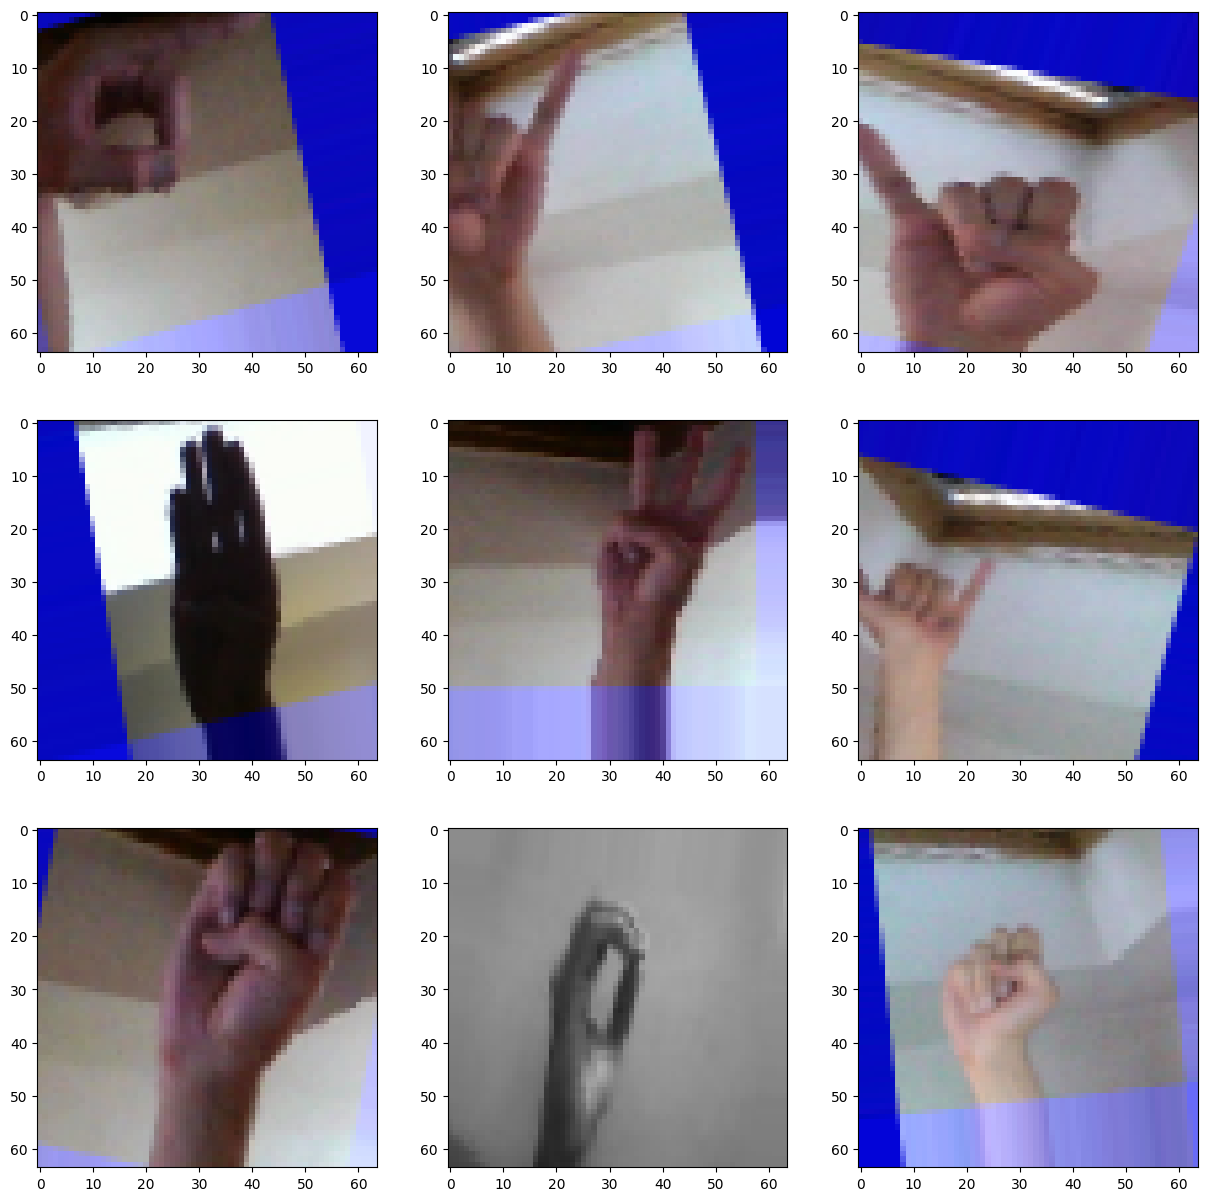

In [6]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='tanh',
                 input_shape=(im_shape[0],im_shape[1],3)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary() #change num_classes to 32

# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

2023-09-05 23:43:34.779885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 23:43:34.780121: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-05 23:43:34.780185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-09-05 23:43:34.780235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-09-05 23:43:34.780284: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [8]:
epochs = 100

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=30,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/100


2023-09-05 23:43:54.490896: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31490048 exceeds 10% of free system memory.
2023-09-05 23:43:54.883296: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17971200 exceeds 10% of free system memory.
2023-09-05 23:43:54.883724: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17971200 exceeds 10% of free system memory.
2023-09-05 23:43:54.985066: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18911232 exceeds 10% of free system memory.
2023-09-05 23:43:54.985849: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18911232 exceeds 10% of free system memory.


600/600 [==============================] - ETA: 0s - loss: 2.5999 - accuracy: 0.2007
Epoch 1: val_loss improved from inf to 3.25002, saving model to model.h5
600/600 [==============================] - 149s 246ms/step - loss: 2.5999 - accuracy: 0.2007 - val_loss: 3.2500 - val_accuracy: 0.2318
Epoch 2/100
600/600 [==============================] - ETA: 0s - loss: 1.3791 - accuracy: 0.5331
Epoch 2: val_loss did not improve from 3.25002
600/600 [==============================] - 137s 228ms/step - loss: 1.3791 - accuracy: 0.5331 - val_loss: 3.5851 - val_accuracy: 0.3746
Epoch 3/100
600/600 [==============================] - ETA: 0s - loss: 0.9414 - accuracy: 0.6795
Epoch 3: val_loss improved from 3.25002 to 2.12625, saving model to model.h5
600/600 [==============================] - 137s 229ms/step - loss: 0.9414 - accuracy: 0.6795 - val_loss: 2.1263 - val_accuracy: 0.5424
Epoch 4/100
600/600 [==============================] - ETA: 0s - loss: 0.7347 - accuracy: 0.7492
Epoch 4: val_loss did 

600/600 [==============================] - 136s 226ms/step - loss: 0.2625 - accuracy: 0.9141 - val_loss: 1.2469 - val_accuracy: 0.7844
Epoch 30/100
600/600 [==============================] - ETA: 0s - loss: 0.2532 - accuracy: 0.9169
Epoch 30: val_loss did not improve from 1.02501
600/600 [==============================] - 135s 226ms/step - loss: 0.2532 - accuracy: 0.9169 - val_loss: 1.2051 - val_accuracy: 0.7910
Epoch 31/100
600/600 [==============================] - ETA: 0s - loss: 0.2494 - accuracy: 0.9183
Epoch 31: val_loss did not improve from 1.02501
600/600 [==============================] - 134s 224ms/step - loss: 0.2494 - accuracy: 0.9183 - val_loss: 1.3672 - val_accuracy: 0.7893
Epoch 32/100
600/600 [==============================] - ETA: 0s - loss: 0.2601 - accuracy: 0.9151
Epoch 32: val_loss improved from 1.02501 to 0.99457, saving model to model.h5
600/600 [==============================] - 134s 223ms/step - loss: 0.2601 - accuracy: 0.9151 - val_loss: 0.9946 - val_accuracy:

600/600 [==============================] - 134s 224ms/step - loss: 0.2088 - accuracy: 0.9331 - val_loss: 1.3005 - val_accuracy: 0.8106
Epoch 59/100
600/600 [==============================] - ETA: 0s - loss: 0.2104 - accuracy: 0.9343
Epoch 59: val_loss did not improve from 0.92743
600/600 [==============================] - 134s 223ms/step - loss: 0.2104 - accuracy: 0.9343 - val_loss: 1.8298 - val_accuracy: 0.7517
Epoch 60/100
600/600 [==============================] - ETA: 0s - loss: 0.2227 - accuracy: 0.9302
Epoch 60: val_loss did not improve from 0.92743
600/600 [==============================] - 134s 224ms/step - loss: 0.2227 - accuracy: 0.9302 - val_loss: 1.4718 - val_accuracy: 0.8046
Epoch 61/100
600/600 [==============================] - ETA: 0s - loss: 0.2104 - accuracy: 0.9360
Epoch 61: val_loss did not improve from 0.92743
600/600 [==============================] - 133s 222ms/step - loss: 0.2104 - accuracy: 0.9360 - val_loss: 1.6669 - val_accuracy: 0.7843
Epoch 62/100
600/600 [

In [9]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

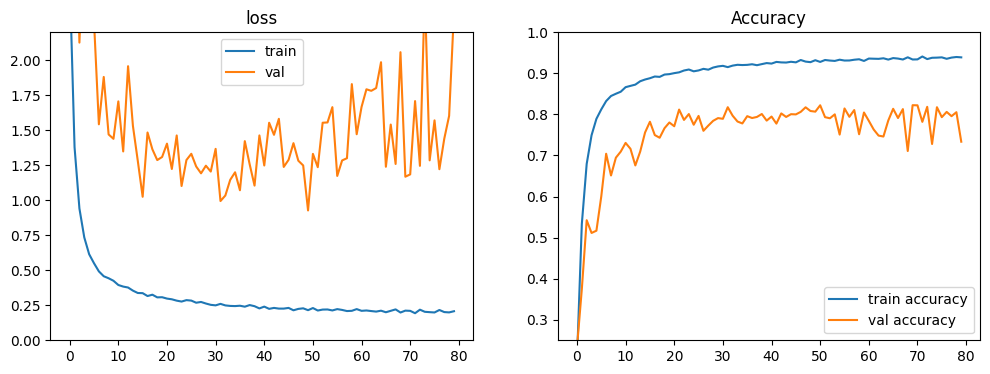

In [10]:
plot_history(history)
plt.show()

In [11]:
score = model.evaluate(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

150/150 [==============================] - 26s 169ms/step - loss: 2.3435 - accuracy: 0.7323
Val loss: 2.343485116958618
Val accuracy: 0.7323253154754639


In [12]:
# Using the test dataset
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

322/322 [==============================] - 48s 148ms/step - loss: 4.2675 - accuracy: 0.6840
Test loss: 4.2675347328186035
Test accuracy: 0.6840060353279114
